# Task 2

## Quantitiative Analysis

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
from pynance import data
import ta

from datetime import datetime

Let's start with first dataset for the analysis.

In [93]:
data_AAPl = pd.read_csv(r"C:\Users\doff n\Desktop\doffneri\week1\src\yfinance_data\AAPL_historical_data.csv")
print(data_AAPl.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')


In [94]:
data_AAPl.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [95]:
data_AAPl["Date"]

0        1980-12-12
1        1980-12-15
2        1980-12-16
3        1980-12-17
4        1980-12-18
            ...    
10993    2024-07-24
10994    2024-07-25
10995    2024-07-26
10996    2024-07-29
10997    2024-07-30
Name: Date, Length: 10998, dtype: object

### Convert the Date into a proper date

In [96]:
data_AAPl["Date"].head()

0    1980-12-12
1    1980-12-15
2    1980-12-16
3    1980-12-17
4    1980-12-18
Name: Date, dtype: object

In [97]:
def convert_to_datetime(date_string):
    try:
        return datetime.strptime(date_string, "%Y-%m-%d")
    except ValueError:
        # Handle or log errors as needed
        return None


In [98]:
data_AAPl['Date'] = data_AAPl['Date'].apply(convert_to_datetime)

In [99]:
data_AAPl["Date"].head()
print(data_AAPl.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10997
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          10998 non-null  datetime64[ns]
 1   Open          10998 non-null  float64       
 2   High          10998 non-null  float64       
 3   Low           10998 non-null  float64       
 4   Close         10998 non-null  float64       
 5   Adj Close     10998 non-null  float64       
 6   Volume        10998 non-null  int64         
 7   Dividends     10998 non-null  float64       
 8   Stock Splits  10998 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 773.4 KB
None


In [100]:
nan_columns = data_AAPl.isnull().any()
print(nan_columns)

Date            False
Open            False
High            False
Low             False
Close           False
Adj Close       False
Volume          False
Dividends       False
Stock Splits    False
dtype: bool


## Analysis Indicators with TA 

NOTE: TALIB requires a toolkit which is intensive. So i am using another library called TA

In [106]:
data_AAPl.fillna(method='bfill', inplace=True)  # Backward fill

C:\Users\doff n\AppData\Local\Temp\ipykernel_6928\3768435593.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_AAPl.fillna(method='bfill', inplace=True)  # Backward fill


In [125]:
ticker = "AAPL"
data_AAPl['SMA20'] = ta.trend.sma_indicator(data_AAPl['Close'], window=20)
data_AAPl['SMA50'] = ta.trend.sma_indicator(data_AAPl['Close'], window=50)

# Exponential Moving Averages
data_AAPl['EMA20'] = ta.trend.ema_indicator(data_AAPl['Close'], window=20)
data_AAPl['EMA50'] = ta.trend.ema_indicator(data_AAPl['Close'], window=50)

# MACD
data_AAPl['MACD'] = ta.trend.macd(data_AAPl['Close'], window_slow=26, window_fast=12)
data_AAPl['MACD_Signal'] = ta.trend.macd_signal(data_AAPl['Close'], window_sign=9)
data_AAPl['MACD_Diff'] = ta.trend.macd_diff(data_AAPl['Close'], window_slow=26, window_fast=12)

# ADX
data_AAPl['ADX'] = ta.trend.adx(data_AAPl['High'], data_AAPl['Low'], data_AAPl['Close'])


### Trend indicators

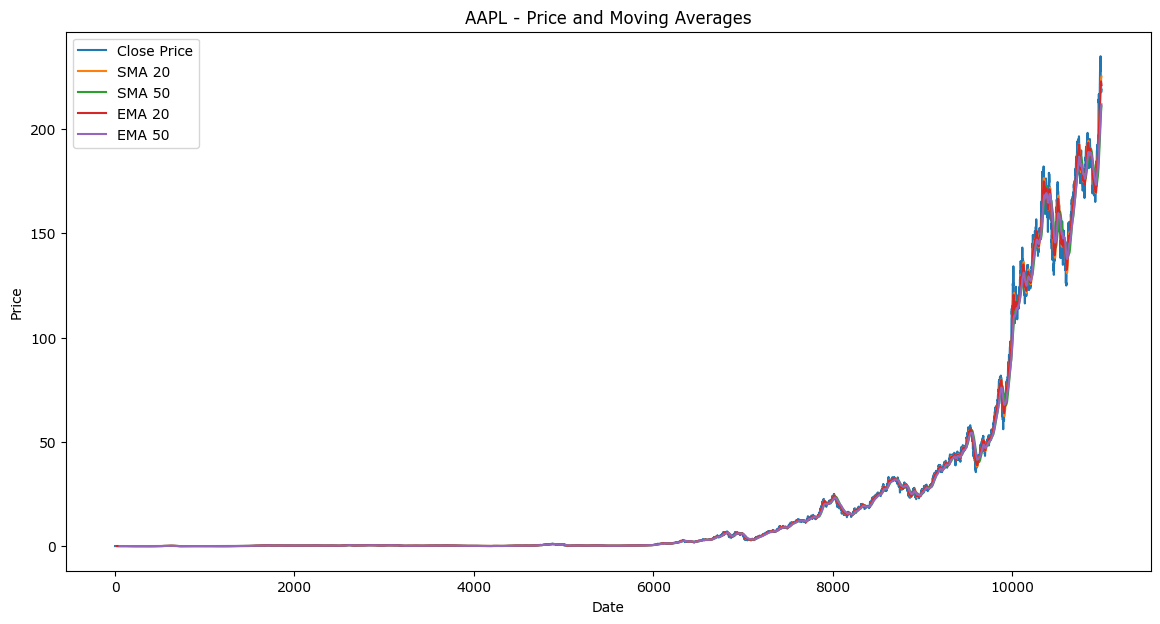

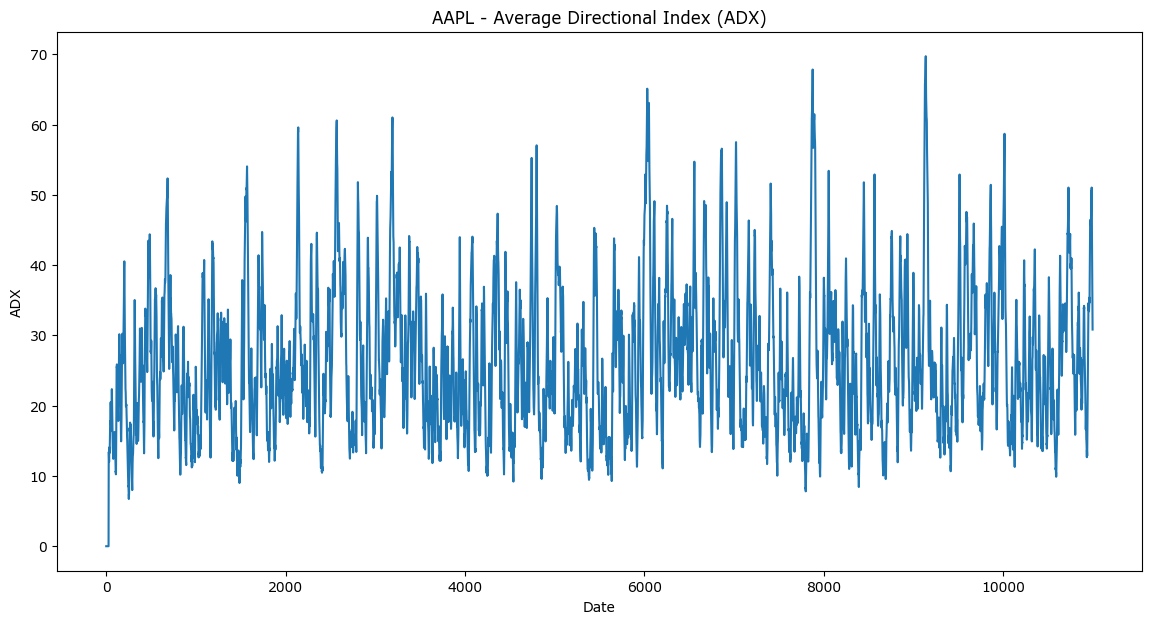

In [126]:
# Function to plot indicators
def plot_indicator(data_AAPl, indicator, title, ylabel):
    plt.figure(figsize=(14, 7))
    plt.plot(data_AAPl.index, data_AAPl[indicator])
    plt.title(f'{ticker} - {title}')
    plt.xlabel('Date')
    plt.ylabel(ylabel)
    plt.show()

# Plot trend indicators
plt.figure(figsize=(14, 7))
plt.plot(data_AAPl.index, data_AAPl['Close'], label='Close Price')
plt.plot(data_AAPl.index, data_AAPl['SMA20'], label='SMA 20')
plt.plot(data_AAPl.index, data_AAPl['SMA50'], label='SMA 50')
plt.plot(data_AAPl.index, data_AAPl['EMA20'], label='EMA 20')
plt.plot(data_AAPl.index, data_AAPl['EMA50'], label='EMA 50')
plt.title(f'{ticker} - Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

plot_indicator(data_AAPl, 'ADX', 'Average Directional Index (ADX)', 'ADX')

###  MACD

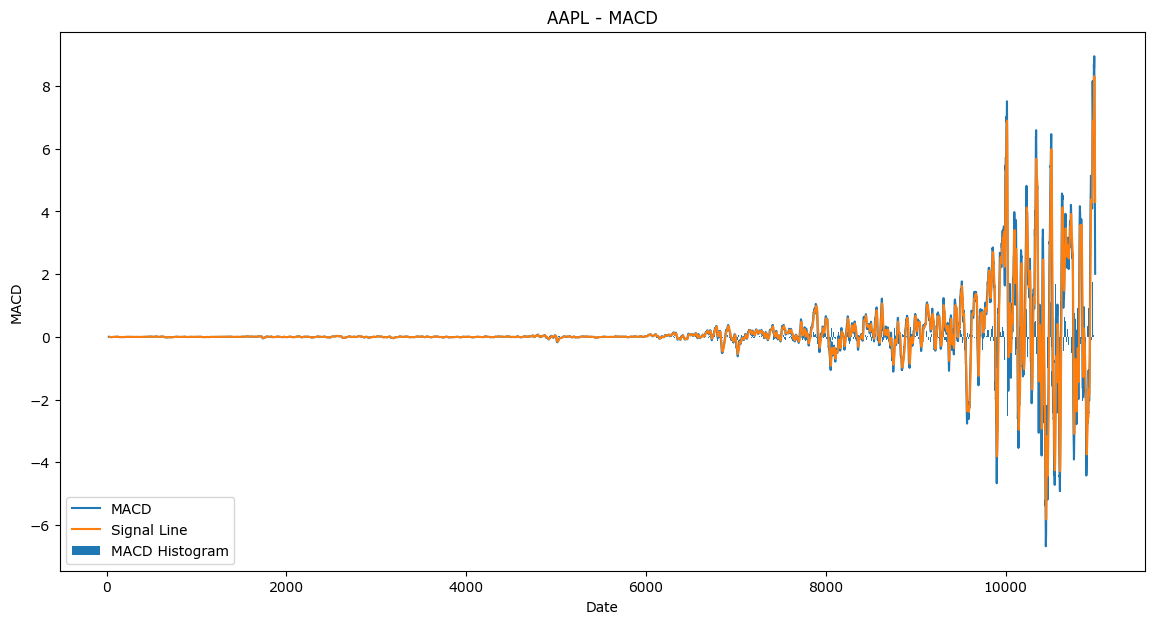

In [127]:
plt.figure(figsize=(14, 7))
plt.plot(data_AAPl.index, data_AAPl['MACD'], label='MACD')
plt.plot(data_AAPl.index, data_AAPl['MACD_Signal'], label='Signal Line')
plt.bar(data_AAPl.index, data_AAPl['MACD_Diff'], label='MACD Histogram')
plt.title(f'{ticker} - MACD')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.show()

### Momentum Indicators

In [128]:
# Momentum Indicators
data_AAPl['RSI'] = ta.momentum.rsi(data_AAPl['Close'], window=14)
data_AAPl['Stoch_K'] = ta.momentum.stoch(data_AAPl['High'], data_AAPl['Low'], data_AAPl['Close'])
data_AAPl['Stoch_D'] = ta.momentum.stoch_signal(data_AAPl['High'], data_AAPl['Low'], data_AAPl['Close'])
data_AAPl['CCI'] = ta.trend.cci(data_AAPl['High'], data_AAPl['Low'], data_AAPl['Close'])

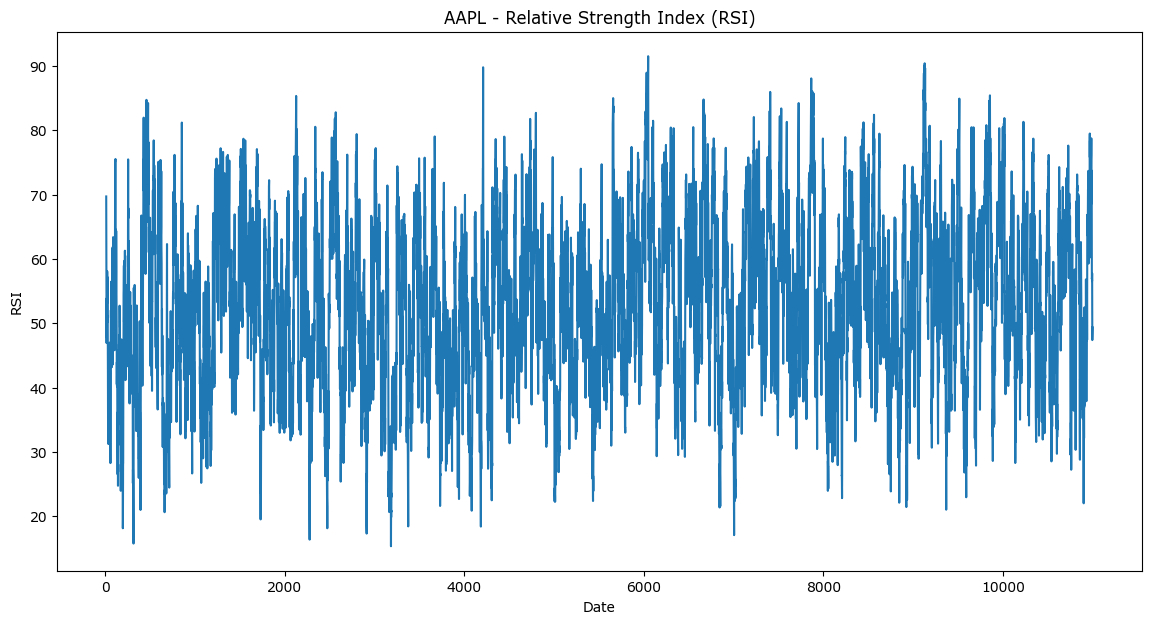

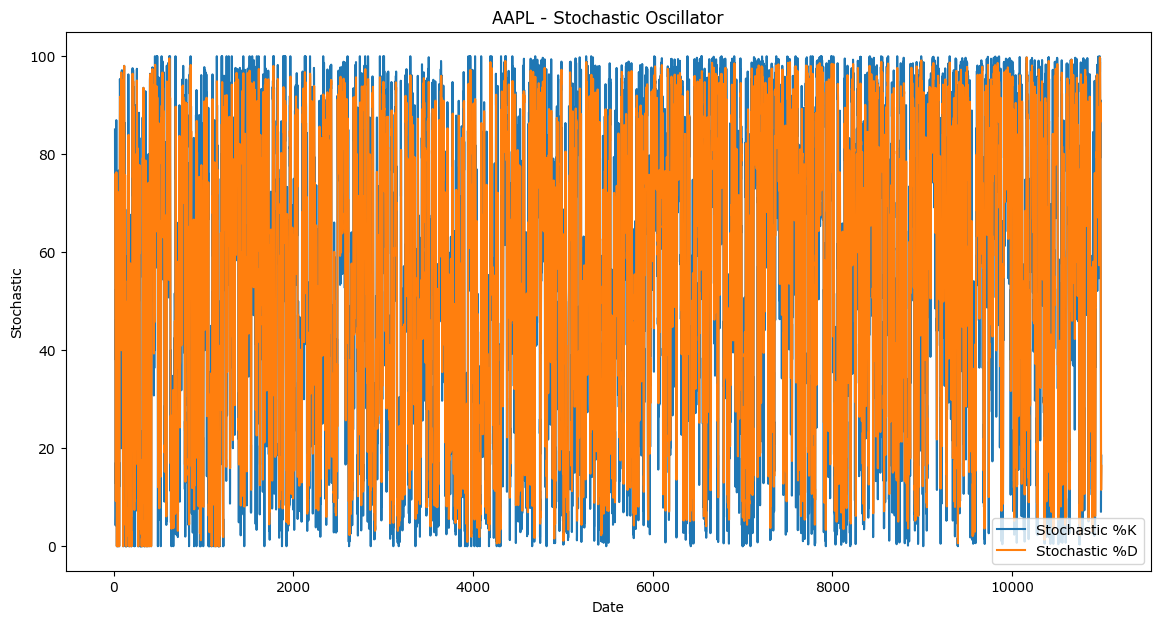

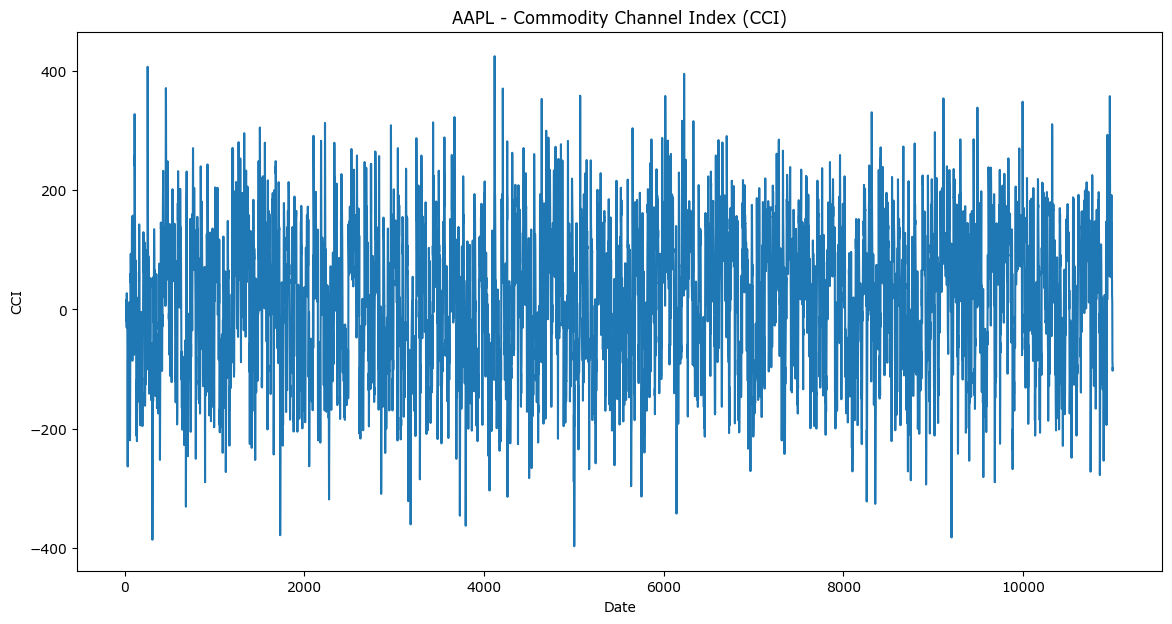

In [129]:
# Plot momentum indicators
plot_indicator(data_AAPl, 'RSI', 'Relative Strength Index (RSI)', 'RSI')

plt.figure(figsize=(14, 7))
plt.plot(data_AAPl.index, data_AAPl['Stoch_K'], label='Stochastic %K')
plt.plot(data_AAPl.index, data_AAPl['Stoch_D'], label='Stochastic %D')
plt.title(f'{ticker} - Stochastic Oscillator')
plt.xlabel('Date')
plt.ylabel('Stochastic')
plt.legend()
plt.show()

plot_indicator(data_AAPl, 'CCI', 'Commodity Channel Index (CCI)', 'CCI')

### Volatility Indicators

In [130]:
# Volatility Indicators
data_AAPl['BB_High'] = ta.volatility.bollinger_hband(data_AAPl['Close'])
data_AAPl['BB_Low'] = ta.volatility.bollinger_lband(data_AAPl['Close'])
data_AAPl['BB_Mid'] = ta.volatility.bollinger_mavg(data_AAPl['Close'])
data_AAPl['ATR'] = ta.volatility.average_true_range(data_AAPl['High'], data_AAPl['Low'], data_AAPl['Close'])

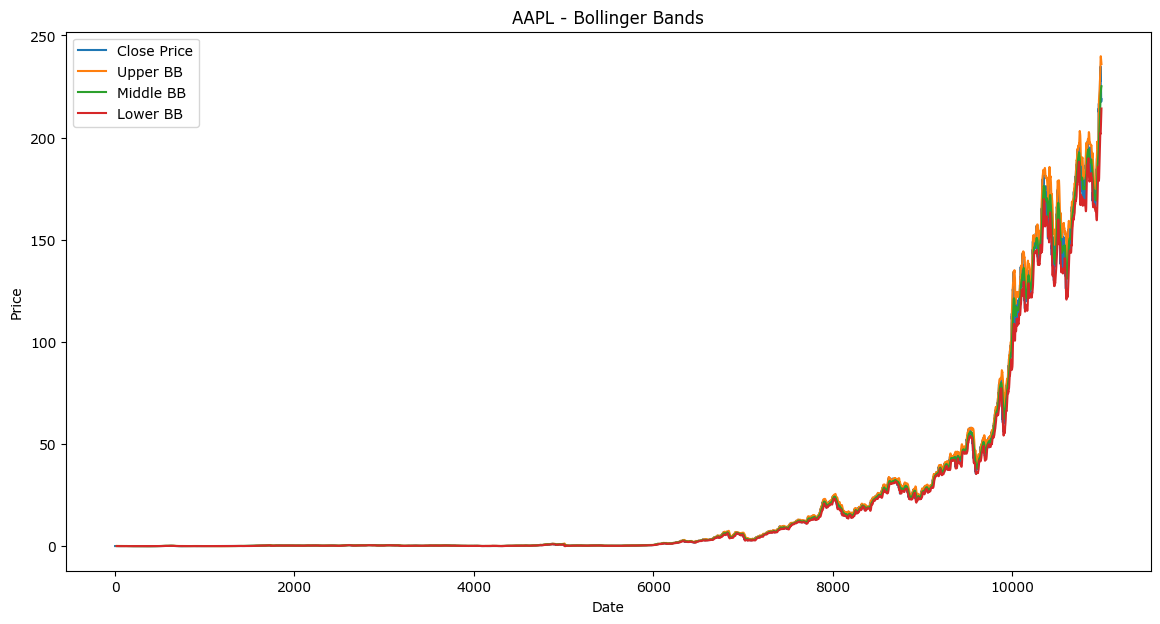

In [131]:
# Plot volatility indicators
plt.figure(figsize=(14, 7))
plt.plot(data_AAPl.index, data_AAPl['Close'], label='Close Price')
plt.plot(data_AAPl.index, data_AAPl['BB_High'], label='Upper BB')
plt.plot(data_AAPl.index, data_AAPl['BB_Mid'], label='Middle BB')
plt.plot(data_AAPl.index, data_AAPl['BB_Low'], label='Lower BB')
plt.title(f'{ticker} - Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### Volume Indicators

In [133]:
# Volume Indicators
data_AAPl['OBV'] = ta.volume.on_balance_volume(data_AAPl['Close'], data_AAPl['Volume'])
data_AAPl['CMF'] = ta.volume.chaikin_money_flow(data_AAPl['High'], data_AAPl['Low'], data_AAPl['Close'], data_AAPl['Volume'])

print(data_AAPl.head())

        Date      Open      High       Low     Close  Adj Close     Volume  \
0 1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1 1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2 1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3 1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4 1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  SMA20  ...  RSI  Stoch_K  Stoch_D  CCI  BB_High  \
0        0.0           0.0    NaN  ...  NaN      NaN      NaN  NaN      NaN   
1        0.0           0.0    NaN  ...  NaN      NaN      NaN  NaN      NaN   
2        0.0           0.0    NaN  ...  NaN      NaN      NaN  NaN      NaN   
3        0.0           0.0    NaN  ...  NaN      NaN      NaN  NaN      NaN   
4        0.0           0.0    NaN  ...  NaN      NaN      NaN  NaN      NaN   

   BB_Low  BB_Mid  ATR        OBV  CMF  
0     NaN     N

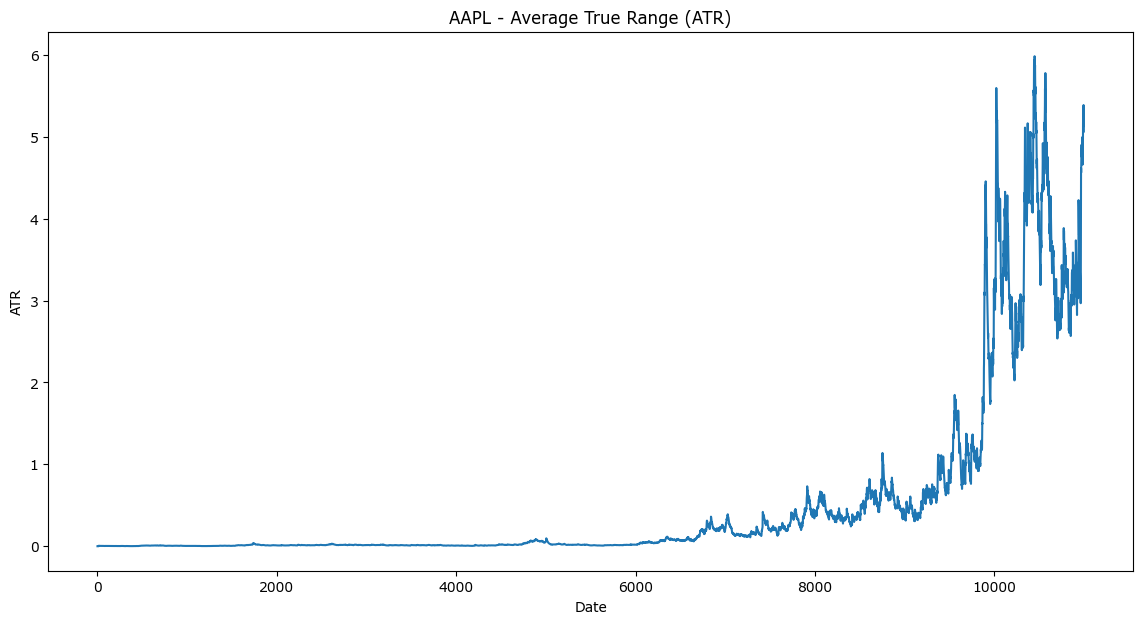

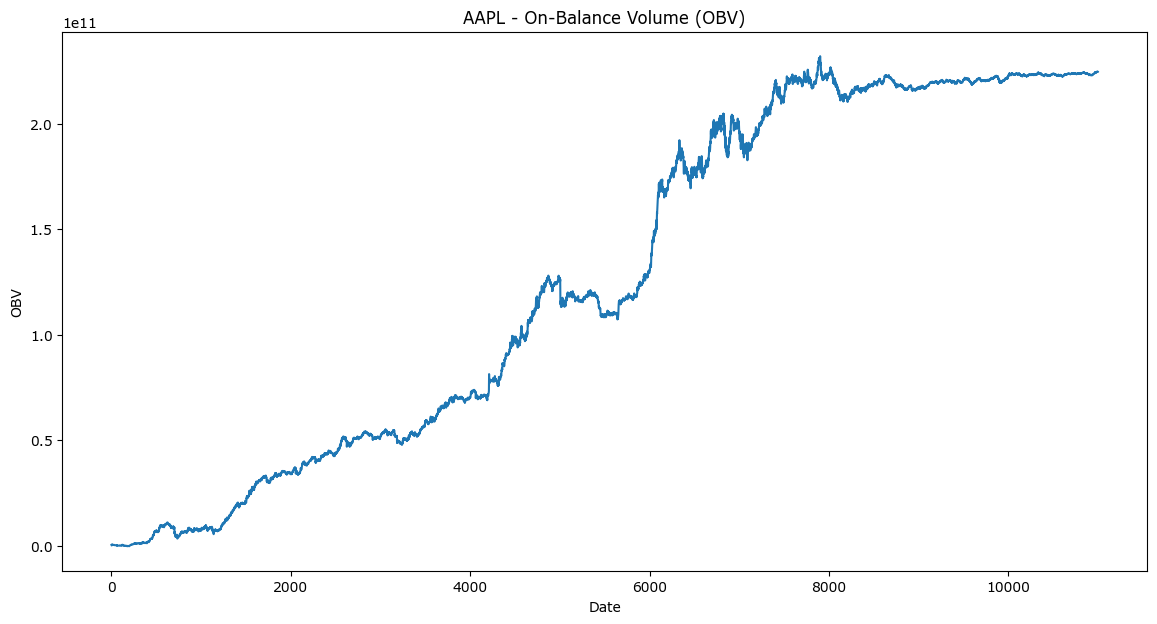

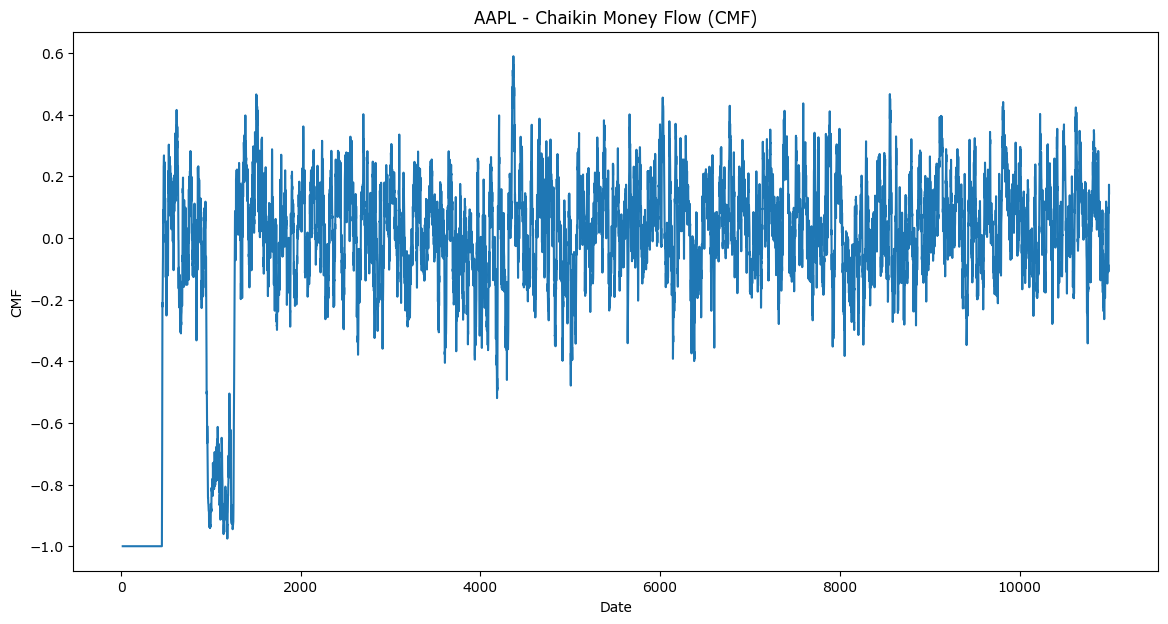

In [134]:



plot_indicator(data_AAPl, 'ATR', 'Average True Range (ATR)', 'ATR')

# Plot volume indicators
plot_indicator(data_AAPl, 'OBV', 'On-Balance Volume (OBV)', 'OBV')
plot_indicator(data_AAPl, 'CMF', 'Chaikin Money Flow (CMF)', 'CMF')

## Using PyNance for Financial Metrics

In [135]:
data_AAPl.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA20,...,RSI,Stoch_K,Stoch_D,CCI,BB_High,BB_Low,BB_Mid,ATR,OBV,CMF
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,469033600,NaN
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,293148800,NaN
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,187420800,NaN
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,273862400,NaN
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,347312000,NaN


In [136]:
data_AAPl.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits', 'SMA20', 'SMA50', 'EMA20', 'EMA50', 'MACD',
       'MACD_Signal', 'MACD_Diff', 'ADX', 'RSI', 'Stoch_K', 'Stoch_D', 'CCI',
       'BB_High', 'BB_Low', 'BB_Mid', 'ATR', 'OBV', 'CMF'],
      dtype='object')

In [120]:
# Display the head of the data with SMA
print(data_AAPl[['Close', 'SMA20', 'MACD']].head())


      Close  SMA20  MACD
0  0.128348    NaN   NaN
1  0.121652    NaN   NaN
2  0.112723    NaN   NaN
3  0.115513    NaN   NaN
4  0.118862    NaN   NaN


### Relative Strength Index (RSI)